# Tutorial: Audio Effects & Exporting with librosa and soundfile

This tutorial teaches you how to apply audio effects using librosa and export your processed audio using soundfile. These skills let you manipulate audio programmatically—from changing tempo to creating special effects.

**What you'll learn:**
- How to time-stretch audio (change speed without changing pitch)
- How to pitch-shift audio (transpose without changing speed)
- How to normalize and apply fades
- How to export audio in various formats

## Step 1: Setup

Install and import the required libraries.

In [ ]:
# Install libraries
!pip install librosa soundfile

# Import libraries
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

print("Libraries loaded successfully!")
print(f"soundfile version: {sf.__version__}")

## Step 2: Load Audio

Load an audio file and examine its properties.

In [ ]:
# Load audio
y, sr = librosa.load(librosa.ex('trumpet'))

print(f"Sample rate: {sr} Hz")
print(f"Duration: {len(y) / sr:.2f} seconds")
print(f"Number of samples: {len(y)}")
print(f"Data type: {y.dtype}")

# Listen to the original
print("\nOriginal audio:")
Audio(y, rate=sr)

## Step 3: Time Stretching

**Time stretching** changes duration without altering pitch. Perfect for practice!

- `rate > 1.0`: Audio plays faster
- `rate < 1.0`: Audio plays slower

In [ ]:
# Slow down to 75% speed (great for practicing difficult passages!)
y_slow = librosa.effects.time_stretch(y, rate=0.75)

print(f"Original duration: {len(y) / sr:.2f} seconds")
print(f"Slowed duration: {len(y_slow) / sr:.2f} seconds")

print("\nSlowed to 75% speed:")
Audio(y_slow, rate=sr)

In [ ]:
# Speed up to 125% speed
y_fast = librosa.effects.time_stretch(y, rate=1.25)

print(f"Original duration: {len(y) / sr:.2f} seconds")
print(f"Fast duration: {len(y_fast) / sr:.2f} seconds")

print("\nSped up to 125% speed:")
Audio(y_fast, rate=sr)

## Step 4: Pitch Shifting

**Pitch shifting** transposes audio without changing tempo.

- `n_steps` = number of semitones to shift
- Positive = higher pitch
- Negative = lower pitch
- 12 semitones = 1 octave

In [ ]:
# Shift up by 4 semitones (a major third)
y_up = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)

print("Pitch shifted UP by 4 semitones (major third):")
Audio(y_up, rate=sr)

In [ ]:
# Shift down by 5 semitones (a perfect fourth)
y_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-5)

print("Pitch shifted DOWN by 5 semitones (perfect fourth):")
Audio(y_down, rate=sr)

In [ ]:
# Shift down by 12 semitones (one octave)
y_octave_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-12)

print("Pitch shifted DOWN by 12 semitones (one octave):")
Audio(y_octave_down, rate=sr)

## Step 5: Combining Effects

Chain multiple effects together for complex transformations.

In [ ]:
# Slow down to 70% AND transpose down 2 semitones
# (useful for practicing a difficult passage in a lower key)
y_practice = librosa.effects.time_stretch(y, rate=0.7)
y_practice = librosa.effects.pitch_shift(y_practice, sr=sr, n_steps=-2)

print(f"Original duration: {len(y) / sr:.2f} seconds")
print(f"Practice version: {len(y_practice) / sr:.2f} seconds")
print("\nSlowed to 70% and transposed down 2 semitones:")
Audio(y_practice, rate=sr)

## Step 6: Volume Normalization

**Normalization** adjusts volume so the loudest peak reaches a target level.

In [ ]:
# Check the current peak amplitude
print(f"Original peak amplitude: {np.max(np.abs(y)):.4f}")

# Normalize to peak at 1.0 (maximum without clipping)
y_normalized = librosa.util.normalize(y)
print(f"Normalized peak amplitude: {np.max(np.abs(y_normalized)):.4f}")

# Normalize to -3 dB below max
target_amplitude = 10**(-3/20)  # Convert dB to linear
y_normalized_3db = librosa.util.normalize(y) * target_amplitude
print(f"Normalized to -3dB: {np.max(np.abs(y_normalized_3db)):.4f}")

Audio(y_normalized, rate=sr)

## Step 7: Export Audio with soundfile

**soundfile** saves processed audio to various formats:
- WAV: Uncompressed, lossless
- FLAC: Compressed, lossless
- OGG: Compressed, lossy but small

In [ ]:
# Export as WAV (uncompressed, lossless)
sf.write('output_processed.wav', y_slow, sr)
print("Saved: output_processed.wav")

# Export as FLAC (compressed, lossless)
sf.write('output_processed.flac', y_slow, sr)
print("Saved: output_processed.flac")

# Check file sizes
wav_size = os.path.getsize('output_processed.wav')
flac_size = os.path.getsize('output_processed.flac')
print(f"\nWAV file size: {wav_size:,} bytes")
print(f"FLAC file size: {flac_size:,} bytes")
print(f"FLAC is {100 * (1 - flac_size/wav_size):.1f}% smaller")

## Step 8: Batch Processing

Create multiple practice versions at different tempos and transpositions.

In [ ]:
# Define practice variations
variations = [
    {'name': 'slow_50', 'rate': 0.5, 'semitones': 0},
    {'name': 'slow_75', 'rate': 0.75, 'semitones': 0},
    {'name': 'normal_down_2', 'rate': 1.0, 'semitones': -2},
    {'name': 'slow_75_down_3', 'rate': 0.75, 'semitones': -3},
]

# Process and save each variation
for var in variations:
    # Apply effects
    y_processed = librosa.effects.time_stretch(y, rate=var['rate'])
    if var['semitones'] != 0:
        y_processed = librosa.effects.pitch_shift(y_processed, sr=sr, n_steps=var['semitones'])
    
    # Normalize
    y_processed = librosa.util.normalize(y_processed)
    
    # Save
    filename = f"practice_{var['name']}.wav"
    sf.write(filename, y_processed, sr)
    print(f"Created: {filename} (rate={var['rate']}, semitones={var['semitones']}")

print("\nAll practice files created!")

## Step 9: Read Audio Metadata

soundfile can read file information without loading the audio data.

In [ ]:
# Read file info
info = sf.info('output_processed.wav')

print("=== Audio File Information ===")
print(f"Duration: {info.duration:.2f} seconds")
print(f"Sample rate: {info.samplerate} Hz")
print(f"Channels: {info.channels}")
print(f"Format: {info.format}")
print(f"Subtype: {info.subtype}")
print(f"Frames (samples): {info.frames}")

## Step 10: Create Custom Fade Effects

Build fade-in and fade-out effects by manipulating the audio directly.

In [ ]:
# Define fade functions
def apply_fade_in(audio, sr, duration=1.0):
    """Apply a fade-in effect to the beginning of audio."""
    fade_samples = int(duration * sr)
    fade_samples = min(fade_samples, len(audio))
    
    fade_curve = np.linspace(0, 1, fade_samples)
    
    audio_faded = audio.copy()
    audio_faded[:fade_samples] = audio_faded[:fade_samples] * fade_curve
    
    return audio_faded

def apply_fade_out(audio, sr, duration=1.0):
    """Apply a fade-out effect to the end of audio."""
    fade_samples = int(duration * sr)
    fade_samples = min(fade_samples, len(audio))
    
    fade_curve = np.linspace(1, 0, fade_samples)
    
    audio_faded = audio.copy()
    audio_faded[-fade_samples:] = audio_faded[-fade_samples:] * fade_curve
    
    return audio_faded

# Apply both fades
y_faded = apply_fade_in(y, sr, duration=0.5)
y_faded = apply_fade_out(y_faded, sr, duration=0.5)

# Save
sf.write('output_with_fades.wav', y_faded, sr)
print("Created audio with fade-in and fade-out")

# Listen
Audio(y_faded, rate=sr)

## Step 11: Visualize Before and After

Compare original and processed audio visually.

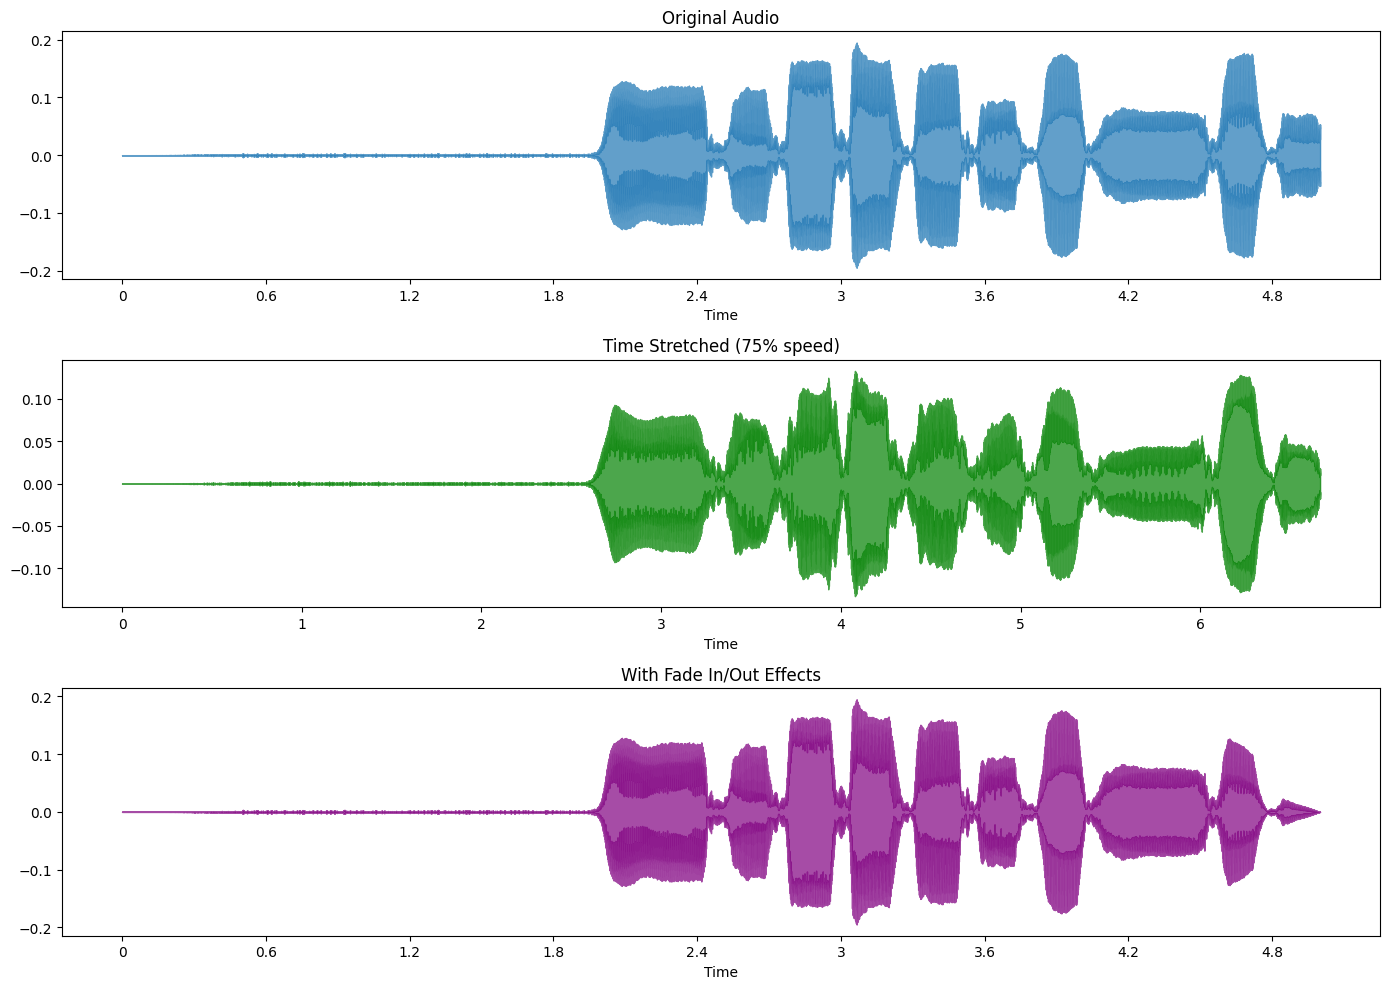

In [1]:
# Create comparison plot
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Original
librosa.display.waveshow(y, sr=sr, ax=axes[0], alpha=0.7)
axes[0].set_title('Original Audio')

# Time stretched (slow)
librosa.display.waveshow(y_slow, sr=sr, ax=axes[1], alpha=0.7, color='green')
axes[1].set_title('Time Stretched (75% speed)')

# With fades
librosa.display.waveshow(y_faded, sr=sr, ax=axes[2], alpha=0.7, color='purple')
axes[2].set_title('With Fade In/Out Effects')

plt.tight_layout()
plt.show()

## Step 12: Complete Processing Function

A reusable function for processing and exporting audio.

In [ ]:
def process_and_export(y, sr, output_path, 
                       speed_factor=1.0, 
                       pitch_semitones=0, 
                       normalize=True,
                       fade_in=0, 
                       fade_out=0,
                       output_format='wav'):
    """
    Complete audio processing and export function.
    
    Args:
        y: Audio data
        sr: Sample rate
        output_path: Path for output file (without extension)
        speed_factor: Time stretch factor (1.0 = no change)
        pitch_semitones: Pitch shift in semitones (0 = no change)
        normalize: Whether to normalize volume
        fade_in: Fade-in duration in seconds
        fade_out: Fade-out duration in seconds
        output_format: Output format ('wav', 'flac')
    """
    y_out = y.copy()
    
    # Apply time stretching
    if speed_factor != 1.0:
        y_out = librosa.effects.time_stretch(y_out, rate=speed_factor)
    
    # Apply pitch shifting
    if pitch_semitones != 0:
        y_out = librosa.effects.pitch_shift(y_out, sr=sr, n_steps=pitch_semitones)
    
    # Apply fades
    if fade_in > 0:
        y_out = apply_fade_in(y_out, sr, fade_in)
    if fade_out > 0:
        y_out = apply_fade_out(y_out, sr, fade_out)
    
    # Normalize
    if normalize:
        y_out = librosa.util.normalize(y_out)
    
    # Export
    output_file = f"{output_path}.{output_format}"
    sf.write(output_file, y_out, sr)
    
    return output_file, len(y_out) / sr

# Example usage
output_file, duration = process_and_export(
    y, sr,
    output_path="my_processed_audio",
    speed_factor=0.8,
    pitch_semitones=-2,
    normalize=True,
    fade_in=0.3,
    fade_out=0.5,
    output_format='wav'
)

print(f"Created: {output_file}")
print(f"Duration: {duration:.2f} seconds")

# Listen to the result
y_result, sr_result = librosa.load(output_file)
Audio(y_result, rate=sr_result)

## Step 13: Upload and Process Your Own Audio

Try processing your own audio file!

In [ ]:
# Upload your own file
from google.colab import files

uploaded = files.upload()

if uploaded:
    filename = list(uploaded.keys())[0]
    y_custom, sr_custom = librosa.load(filename)
    
    print(f"\nLoaded: {filename}")
    print(f"Duration: {len(y_custom) / sr_custom:.2f} seconds")
    
    # Create a practice version
    output_file, duration = process_and_export(
        y_custom, sr_custom,
        output_path="my_practice_version",
        speed_factor=0.75,  # Slow to 75%
        pitch_semitones=0,
        normalize=True,
        fade_in=0.5,
        fade_out=0.5
    )
    
    print(f"\nCreated practice version: {output_file}")
    print(f"New duration: {duration:.2f} seconds")
    
    # Download the processed file
    files.download(output_file)
    
    # Listen
    y_result, sr_result = librosa.load(output_file)
    Audio(y_result, rate=sr_result)

## Practice Exercises

1. **Create a practice tool**: Make versions at 50%, 75%, and 100% speed
2. **Transposition helper**: Generate all 12 transpositions of a melody
3. **Crossfade**: Blend two audio files together

In [ ]:
# Practice space - try the exercises here!

# Exercise 2: Generate all 12 transpositions
# for semitones in range(-6, 6):
#     y_transposed = librosa.effects.pitch_shift(y, sr=sr, n_steps=semitones)
#     sf.write(f'transposed_{semitones:+d}.wav', y_transposed, sr)

## Key Concepts Summary

1. **Time stretching** changes duration without affecting pitch
2. **Pitch shifting** transposes without affecting tempo
3. **soundfile** provides robust audio file I/O
4. **Effects can be chained** for complex processing
5. **Normalization** ensures consistent volume levels

---

**Congratulations!** You've completed the librosa and soundfile tutorial series. You now have the tools to analyze, process, and export audio programmatically!